In [393]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50) 

# Attribute Information:
------------------------
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)   (one-hot encoding??)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy    (one-hot encoding??)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      (one-hot encoding??)

## Variable to be predicted 
------------------------ 
Absence (1) or presence (2) of heart disease 

## Load dataset

In [2]:
colnames = ['x_' + str(n) for n in range(13)]
colnames += ['target']

df = pd.read_csv('heart.csv', sep=' ', names=colnames)
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


## Describe dataset

In [3]:
print("Checking for null:")
print(df.info())

print("\n Value counts for target:")
df['target'].value_counts()

Checking for null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
x_0       270 non-null float64
x_1       270 non-null float64
x_2       270 non-null float64
x_3       270 non-null float64
x_4       270 non-null float64
x_5       270 non-null float64
x_6       270 non-null float64
x_7       270 non-null float64
x_8       270 non-null float64
x_9       270 non-null float64
x_10      270 non-null float64
x_11      270 non-null float64
x_12      270 non-null float64
target    270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB
None

 Value counts for target:


1    150
2    120
Name: target, dtype: int64

In [4]:
df.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
y = df.iloc[:, df.columns == 'target']
X = df.iloc[:, df.columns != 'target']

In [68]:
categorical_colnames = ['x_1', 'x_2', 'x_5', 'x_6', 'x_8', 'x_10', 'x_11', 'x_12']
categorical = X[categorical_colnames]
continous = X.loc[:, ~X.columns.isin(categorical_colnames)]
continous.head()

,x_0,x_3,x_4,x_7,x_9
0,70.0,130.0,322.0,109.0,2.4
1,67.0,115.0,564.0,160.0,1.6
2,57.0,124.0,261.0,141.0,0.3
3,64.0,128.0,263.0,105.0,0.2
4,74.0,120.0,269.0,121.0,0.2


### Zamiana zmiennych ciągłych na zmienne kategoryczne ze względu na kwartyle

In [61]:
cat = pd.DataFrame(index=range(len(df)))

for n, col in enumerate(continous):
    for i in range(len(df)):
        cat[col] = pd.qcut(continous[col], 4, duplicates='drop')

In [73]:
X = pd.concat([cat, categorical], sort=False, axis=1)

## Eksploracyjna analiza danych

In [409]:
print('Rozkład wieku badanych osób:')
print('Wiek             ', 'Liczba osób')
X.x_0.value_counts()

Rozkład wieku badanych osób:
Wiek              Liczba osób


(28.999, 48.0]    74
(55.0, 61.0]      67
(61.0, 77.0]      65
(48.0, 55.0]      64
Name: x_0, dtype: int64

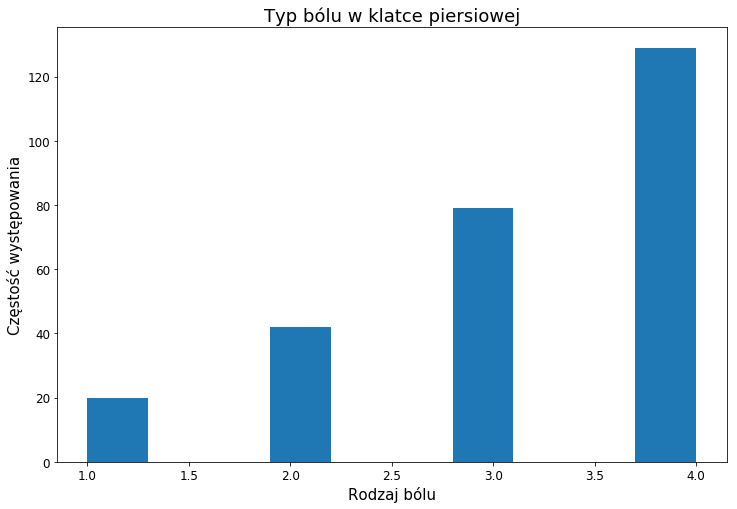

In [424]:
plt.figure(figsize=(12,8))
X.x_2.hist()
plt.title('Typ bólu w klatce piersiowej', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)3
plt.ylabel('Częstość występowania', fontsize=15)
plt.xlabel('Rodzaj bólu', fontsize=15)
plt.grid(False)
plt.show();

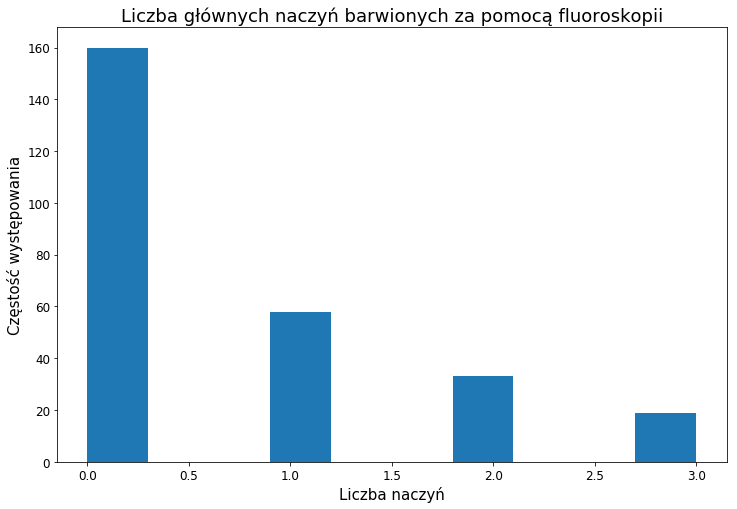

In [430]:
plt.figure(figsize=(12,8))
X.x_11.hist()
plt.title('Liczba głównych naczyń barwionych za pomocą fluoroskopii', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Częstość występowania', fontsize=15)
plt.xlabel('Liczba naczyń', fontsize=15)
plt.grid(False)
plt.show();

## Create Decision Tree

Pseudokod:
Wejście: zbiór danych z etykietami D
1. Drzewo = []
2. Jeśli D jest “czysty” (nie zawiera zanieczyszczeń) lub zaszły inne kryteria stopu then
zakończ
3. Dla każdej cechy a, która należy do D oblicz przyrost informacji
4. a_best = najlepszy atrybut według powyższego kryterium
5. Drzewo = stwórz węzeł decyzyjny, który sprawdza a_best dla korzenia
6. D_v = Stworzony podzbiór z D na podstawie a_best
7. Dla każdego D_v:
8. Drzewo_v = C4.5(D_v)
9. Dołącz Drzewo_v do odpowiedniej gałęzi Drzewa
10. Zakończ
11. Zwróć drzewo

In [74]:
def pure(y):
    y = y.iloc[:,0]
    return len(y.value_counts()) == 1

In [75]:
def entropy(df):
    ''' calculate entropy H = − sum: p(i) * log2p(i) of "a" '''
    entropy = 0
    a = df.iloc[:,0]
    
    # calculate share p(i)
    share = a.value_counts() / len(a)
    
    # calculate entropy
    for p in share:
        if p != 0.0:
            entropy -= p * np.log2(p)
            
    return entropy

In [76]:
def information_gain(y, col):
    ''' Calculate information gain I(y,x)=H(y)−[px=0*H(y|x=0) + px=1*H(y|x=1))]'''

    H = entropy(y)
    
    share = col.value_counts() / len(col)
    
    for v, p in share.iteritems():
        H -= p * entropy(y[col == v])
    
    return H

In [77]:
def separate_feature(col): 
    ''' Separate column by unique value and get indices of them in column '''
    
    result = {unique_value: (col==unique_value).nonzero()[0] for unique_value in col.unique()}
    
    return result

In [124]:
X = X[['x_0','x_1', 'x_2','x_3','x_4', 'x_5', 'x_6','x_7', 'x_8','x_9', 'x_10', 'x_11', 'x_12']]

In [84]:
Tree = []

def split_tree(X, y):
    # check if dataset is "pure"
    if pure(y) or len(y) == 0:
        return y.values
    
    ## select feature based on information gain
    gain = [information_gain(y, X[feature]) for feature in X]
    selected_feature = gain.index(max(gain))

    # if there's no gain - return labels
    if all(i < 1e-5 for i in gain):
        return y.values

    ## get indices for each unique value in selected feature
    indices = separate_feature(X.iloc[:, selected_feature])
    
    result_tree = {}
    for k, v in indices.items():
        x_subset = X.take(v, axis=0)
        y_subset = y.take(v, axis=0)

        result_tree["x_%d = %s" % (selected_feature, k)] = split_tree(x_subset, y_subset)
        
    return result_tree
    
Tree = split_tree(X, y)

In [372]:
Tree = []

def split_tree(X, y, tree=None):
    # check if dataset is "pure"
    if pure(y) or len(y) == 0:
#         print('pure', y.values[0][0])
        return y.values[0][0]
    
    ## select feature based on information gain
#     print('zaczynam IG')
    gain = [information_gain(y, X[feature]) for feature in X]
    selected_feature = gain.index(max(gain))
#     print('selected feature u gory', selected_feature)

    # if there's no gain - return labels
    if all(i < 1e-5 for i in gain):
        return y.values[0][0]

    ## get indices for each unique value in selected feature
    indices = separate_feature(X.iloc[:, selected_feature])
    
#     result_tree = {}
    if tree is None:                    
        tree={}
        tree["x_{}".format(selected_feature)] = {}
    
    for k, v in indices.items():
        x_subset = X.take(v, axis=0)
        y_subset = y.take(v, axis=0)

        tree["x_{}".format(selected_feature)][k] = split_tree(x_subset, y_subset)
    
        
    return tree

## Podział na zbiór treningowy i testowy

In [ ]:
s = int(len(X)*0.965)

X_train = X[:s]
X_test = X[s:]

y_train = y[:s]
y_test = y[s:]

## Dopasowanie modelu

In [373]:
Tree = split_tree(X_train, y_train)

In [206]:
from pprint import pprint
pprint(Tree)

{'x_12': {3.0: {'x_2': {1.0: {'x_4': {Interval(125.999, 213.0, closed='right'): 1,
                                      Interval(213.0, 245.0, closed='right'): {'x_3': {Interval(130.0, 140.0, closed='right'): {'x_0': {Interval(55.0, 61.0, closed='right'): 2,
                                                                                                                                        Interval(61.0, 77.0, closed='right'): 1}},
                                                                                       Interval(140.0, 200.0, closed='right'): 1}},
                                      Interval(245.0, 280.0, closed='right'): 2,
                                      Interval(280.0, 564.0, closed='right'): {'x_0': {Interval(55.0, 61.0, closed='right'): 1,
                                                                                       Interval(61.0, 77.0, closed='right'): 2}}}},
                        2.0: {'x_0': {Interval(28.999, 48.0, closed='right'): 1,
       

#### sprawdzenie kilku pierwszych reguł:

In [12]:
y.loc[X[X['x_4'] == 126].index]

,target
60,1


In [13]:
y.loc[X[X['x_4'] == 141].index]

,target
100,1


In [14]:
y.loc[X[X['x_4'] == 149].index]

,target
15,1
46,2


In [15]:
X[X['x_4'] == 149]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12
15,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0
46,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0


## Predykcja na zbiorze testowym

In [366]:
def predict(obs,tree):
    for selected_feature in tree.keys():        
        k = obs[selected_feature]
        tree = tree[selected_feature][k]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(obs, tree)
        else:
            prediction = tree
            break;                            

    return prediction

In [374]:
predicted = []
real = []

for i, item in X_test.iterrows():
    n = item.name
    y_real = y.iloc[n]
    print('y_real', y_real[0])
    y_hat = predict(item, Tree)
    print('y_hat', y_hat)
    
    predicted.append(y_hat)
    real.append(y_real[0])

y_real 1
y_hat 1
y_real 2
y_hat 2
y_real 2
y_hat 1
y_real 1
y_hat 1
y_real 2
y_hat 2
y_real 1
y_hat 1
y_real 1
y_hat 2
y_real 1
y_hat 2
y_real 1
y_hat 1
y_real 2
y_hat 2


In [387]:
from sklearn.metrics import confusion_matrix

m_pomylek = confusion_matrix(real, predicted)
m_pomylek

array([[4, 2],
       [1, 3]])

In [369]:
suma = 0
for i in range(len(m_pomylek)):
    suma += m_pomylek[i][i]
    
print("Skuteczność: ",suma/sum(sum(m_pomylek))) 

Skuteczność:  0.7


In [389]:
real

[1, 2, 2, 1, 2, 1, 1, 1, 1, 2]

In [388]:
from sklearn.metrics import classification_report

# target_names = ['Brak występowania choroby serca', 'Występowanie choroby serca',]
print(classification_report(real, predicted, target_names=target_names))
print(classification_report(real, predicted))


                                 precision    recall  f1-score   support

Brak występowania choroby serca       0.80      0.67      0.73         6
     Występowanie choroby serca       0.60      0.75      0.67         4

                      micro avg       0.70      0.70      0.70        10
                      macro avg       0.70      0.71      0.70        10
                   weighted avg       0.72      0.70      0.70        10

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.60      0.75      0.67         4

   micro avg       0.70      0.70      0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



Wnioski:

Skuteczność (ACU) drzewa decyzyjnego wyniosła 70 %.

Precyzja 
         - Jeśli klasfykator stwierdził, że rozpoznał osobę zdrową, prawidłowo wskazał 80 % przypadków
         - Jeśli klasfykator stwierdził, że rozpoznał osobę chorą, prawidłowo wskazał 60 % przypadków

Czułość
        -  Ze wszystkich osób zdrowych klasyfikator prawidłowo rozpoznał 67 % przypadków
        -  Ze wszystkich osób chorych klasyfikator prawidłowo rozpoznał 75 % przypadków

